In [35]:
# %%
# Python standard library
import math
import random

from random import choice

# custom utils
from utils import display_maze
from examples.dense_maze_4x3 import maze

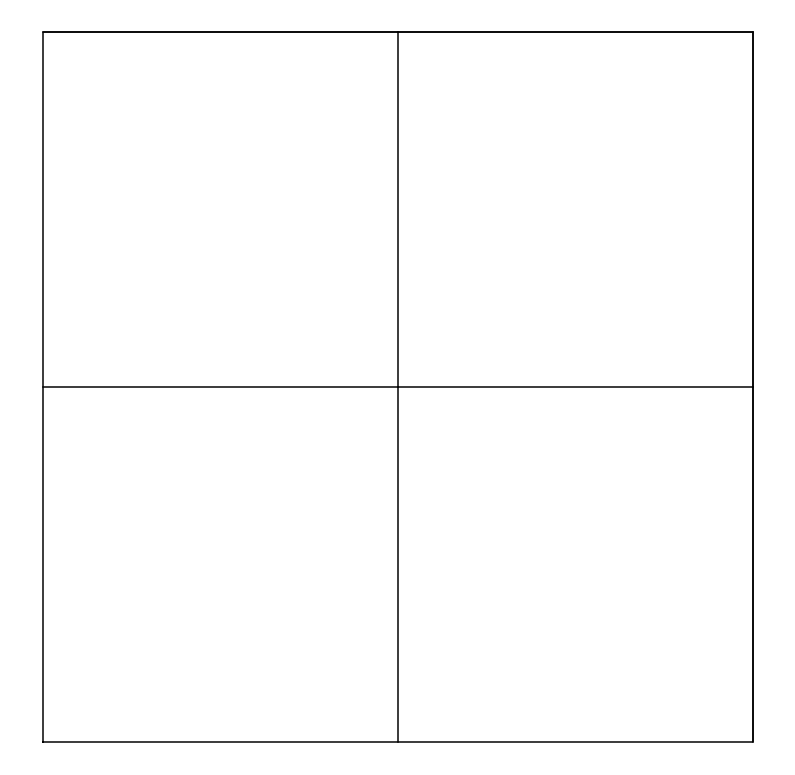

In [8]:
# Votre code ici !

In [ ]:
Développez une fonction `full_maze(width, height)` qui produit le graphe
d'un labyrinthe rectangulaire contenant la cellule `(0, 0)`, large de 
`width` cellules, haut de `height` cellules et contenant un mur entre
chaque paire de cellules adjacentes.

Puis, développez une fonction `empty_maze(width, height)` qui produit le
graphe rectangulaire similaire mais sans aucun mur interne.

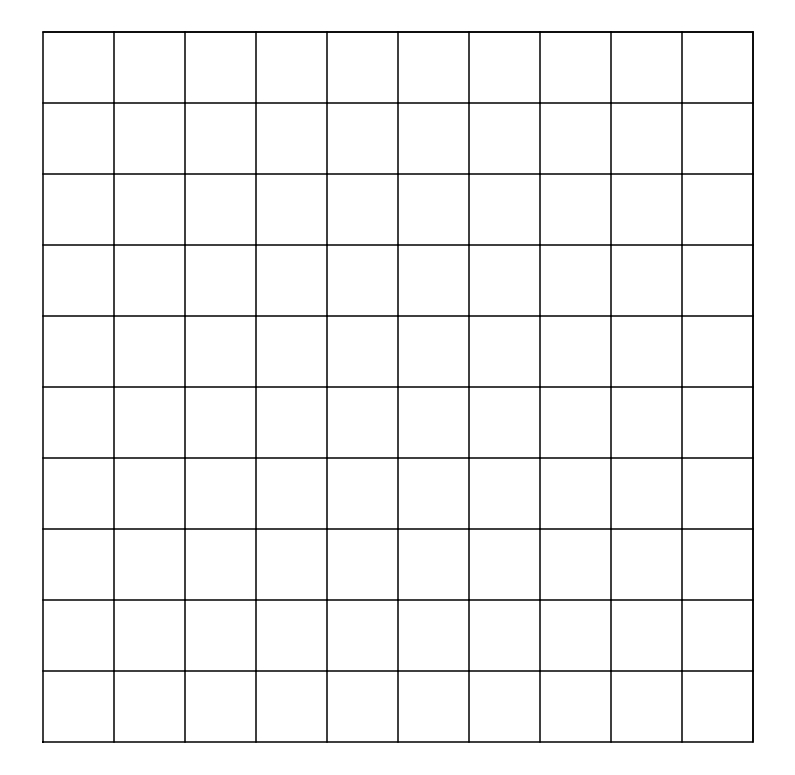

In [23]:
vertices = set([])
edges = set([
])

def full_maze(width, height):
    L=[]
    for h in range (height) :
        for w in range (width) :
            L.append((h, w))
    vertices = set(L)
    edges = set([
    ])
    weights = {}
    display_maze((vertices,edges,weights))

full_maze(10,10)

#autre façon de le faire : 

vertices = set(product(range(width),range(height)))
edges = set()
weights = {}

return (
   vertices,
   edges,
   weights
)


#encore une autre façon : 

vertices = set()
for col in range(width):
    for row in range(height):
        vertices.add(row,col)
edges = set()
weights = {}


return (
   vertices,
   edges,
   weights
)


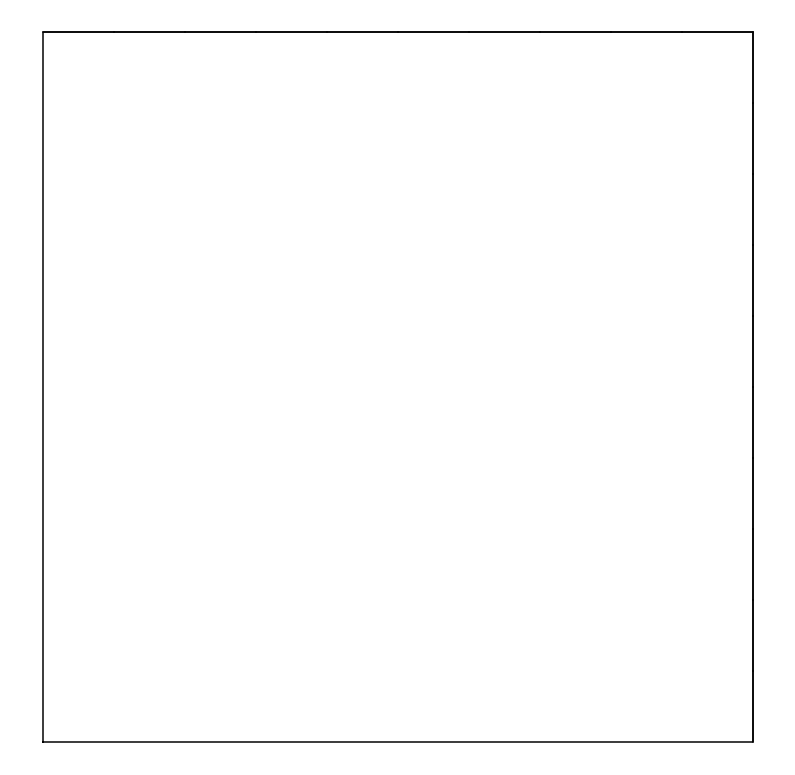

In [28]:

def empty_maze(width, height):
    L1=[]
    L2=[]
    for h in range (height) :
        for w in range (width) :
            L1.append((h, w))
            if h-1>=0:
                L2.append(((h-1,w),(h,w)))
            if h+1<height:
                L2.append(((h,w),(h+1,w)))
            if w-1>=0:
                L2.append(((h,w-1),(h,w)))
            if w+1<width:
                L2.append(((h,w),(h,w+1)))
    vertices = set(L1)
    edges = set(L2
    )
    weights = {}
    display_maze((vertices,edges,weights))

empty_maze(10,10)

#autre façon de faire : 

#def empty_maze(width, height):
    #vertices = set(product(range(width),range(height)))


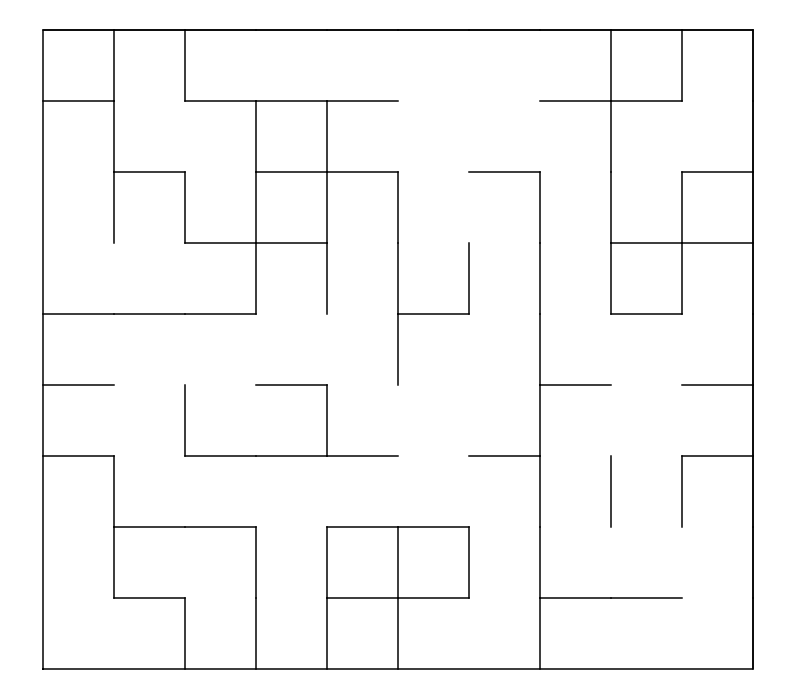

In [32]:
#on essaie de créer un labyrinthe au hasard 


def random_maze():
    width = random.randint(5,15)
    height = random.randint(5,15)
    L1=[]
    L2=[]
    for h in range (height) :
        for w in range (width) :
            L1.append((h, w))
            if h-1>=0:
                if random.randint(0,2)==1:
                    L2.append(((h-1,w),(h,w)))
                    L2.append(((h,w),(h-1,w)))
            if h+1<height:
                if random.randint(0,2)==1:
                    L2.append(((h,w),(h+1,w)))
                    L2.append(((h+1,w),(h,w)))
            if w-1>=0:
                if random.randint(0,2)==1:
                    L2.append(((h,w-1),(h,w)))
                    L2.append(((h,w),(h,w-1)))
            if w+1<width:
                if random.randint(0,2)==1:
                    L2.append(((h,w),(h,w+1)))
                    L2.append(((h,w+1),(h,w)))
    vertices = set(L1)
    edges = set(L2
    )
    weights = {}
    display_maze((vertices,edges,weights))

random_maze()



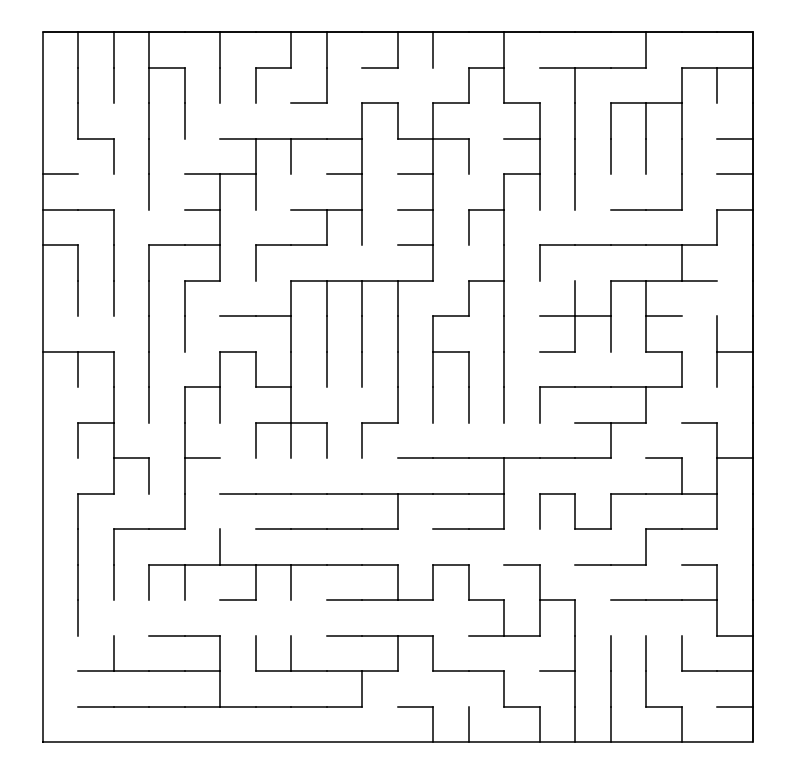

In [40]:
directions = [
    (0,1),
    (0,-1),
    (1,0),
    (-1,0)
]


def maze(width, height, starting_point=(0,0)):

    vertices = {(col,row) for col in range (width) for row in range (height)}

    edges = set()
    to_visit = { starting_point }
    finished = set()
    while len(to_visit)>0:
        current = choice(list(to_visit))
        col, row = current 

        neighbours = {
            (col+dcol, row+drow) 
            for dcol, drow in directions 
            if (col+dcol, row+drow) in vertices
        }

        candidates = neighbours - finished - to_visit

        if len(candidates)>0:
            new = random.choice(list(candidates))
            edges.add((current, new))
            edges.add((new,current))
            to_visit.add(new)

        if len(candidates) <= 1 :
            finished.add(current)
            to_visit.remove(current)

    weight={ edge:1 for edge in edges }
    return vertices, edges, weights

display_maze(maze(20,20))